In [44]:
import pandas as pd
import seaborn as sns

<H1> Visual Analytics - Final Exam - EDA Process

<H1> 1. Reading in the data & and adding the country information

In [45]:
# read in Olympics data and accompanying country-code/region data
dfOlympics = pd.read_csv("/Users/marlonbraun/Desktop/CBS Copenhagen/1. Semester/Visual Analytics/Final Project/Project/Data/Olympic Data/athlete_events.csv")
dfCouns = pd.read_csv("/Users/marlonbraun/Desktop/CBS Copenhagen/1. Semester/Visual Analytics/Final Project/Project/Data/Olympic Data/noc_regions.csv")

# solve merging problem by adjusting region code for Singapore
dfCouns.loc[dfCouns["NOC"] == "SIN", "NOC"] = "SGP"
# during previous iterations, we noticed that there's an error in the country data, and we need to change the region of Tuvalu to Tuvalu
dfCouns.loc[dfCouns["NOC"] == "TUV", "region"] = "Tuvalu"
# rename Boliva to Bolivia to enable easier processing in Tableau
dfCouns.loc[dfCouns["region"] == "Boliva", "region"] = "Bolivia"

In [46]:
# merge Olympics data with the country/region data to get information on the country
dfOlympics = dfOlympics.merge(dfCouns[["NOC", "region"]], how = "left", on = "NOC")

In [47]:
# investigate if the merge failed for some countries
dfOlympics[dfOlympics["region"].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
6267,3515,Paulo Amotun Lokoro,M,24.0,170.0,61.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 1,500 metres",NaN,NaN
7908,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,NaN
7909,4379,Rami Anis,M,25.0,178.0,78.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Butterfly,NaN,NaN
21529,11364,Yiech Pur Biel,M,21.0,178.0,62.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 800 metres,NaN,NaN
31708,16287,Mabika Yolande Bukasa,F,28.0,170.0,70.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Middleweight,NaN,NaN
40238,20693,James Nyang Chiengjiek,M,24.0,179.0,59.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 400 metres,NaN,NaN
61080,31292,Fritz Eccard,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN
119392,60444,Yonas Kinde,M,36.0,172.0,57.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's Marathon,NaN,NaN
130721,65813,A. Laffen,M,NaN,NaN,NaN,Unknown,UNK,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Architecture,NaN,NaN
141669,71067,Anjelina Nadai Lohalith,F,23.0,163.0,50.0,Refugee Olympic Athletes,ROT,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN,NaN


In [48]:
# since the remaining teams can't be added to a specific country, we drop them
dfOlympics = dfOlympics.dropna(subset= ["region"])
# also drop "Individual Olympic Athletes" since they can't be added to a specific country, which is needed for our dashboard
dfOlympics = dfOlympics[dfOlympics["region"] != "Individual Olympic Athletes"]

In [49]:
# final check if all data points now have a country (here: named region) associated to them
dfOlympics[dfOlympics["region"].isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region


In [50]:
# drop the team name since we don't need it anymore
dfOlympics.drop(columns= "Team", inplace= True)

<H1> 2. Explorative data analysis

<b> Exploration

In [42]:
dfOlympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271008 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271008 non-null  int64  
 1   Name    271008 non-null  object 
 2   Sex     271008 non-null  object 
 3   Age     261536 non-null  float64
 4   Height  210865 non-null  float64
 5   Weight  208161 non-null  float64
 6   Team    271008 non-null  object 
 7   NOC     271008 non-null  object 
 8   Games   271008 non-null  object 
 9   Year    271008 non-null  int64  
 10  Season  271008 non-null  object 
 11  City    271008 non-null  object 
 12  Sport   271008 non-null  object 
 13  Event   271008 non-null  object 
 14  Medal   39778 non-null   object 
 15  region  271008 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 43.2+ MB


In [10]:
# explore first rows of the data
dfOlympics.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands


In [51]:
# investigate occurences of each medal to determine quality of data
dfOlympics.Medal.value_counts()

Gold      13371
Bronze    13292
Silver    13115
Name: Medal, dtype: int64

In [41]:
# explore unique entries in the Medal column
dfOlympics.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [11]:
# summary statistics
dfOlympics.describe()

,ID,Age,Height,Weight,Year
count,271008.000000,261536.000000,210865.000000,208161.000000,271008.000000
mean,68250.760893,25.557147,175.338733,70.701966,1978.371288
std,39023.186952,6.393800,10.518497,14.347691,29.879861
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68203.500000,24.000000,175.000000,70.000000,1988.000000
75%,102103.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
# investigate instance of 97 year old (outlier)
dfOlympics[dfOlympics["Age"] == 97]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN,USA


In [43]:
dfOlympics[dfOlympics["Height"] == 127.000000]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
29333,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Individual All-Around,NaN,Mexico
29334,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Team All-Around,NaN,Mexico
29335,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Floor Exercise,NaN,Mexico
29336,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Horse Vault,NaN,Mexico
29337,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Uneven Bars,NaN,Mexico
29338,15150,Rosario Briones,F,15.0,127.0,42.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Gymnastics,Gymnastics Women's Balance Beam,NaN,Mexico
164821,82769,Lyton Levison Mphande,M,25.0,127.0,62.0,Malawi,MAW,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Light-Welterweight,NaN,Malawi


In [32]:
# find unique values
print(dfOlympics.Season.unique())
print(dfOlympics.Sport.unique())

['Summer' 'Winter']
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics']


<b> Missing values

In [13]:
# check for NaN
dfOlympics.isna().sum()

ID             0
Name           0
Sex            0
Age         9472
Height     60143
Weight     62847
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231230
region         0
dtype: int64

In [ ]:
"""

There are quite a number of missing values for the age, weight and height,
however since we want to include this data as an average in our dashboard
and allow for filtering based on gender, discipline, country, and so on,
filling these datapoints would heavily skew the results when taking just the median/mean for some filtering variants.
We would have to use a filling value that is according to a variety of categories (mean for women, from country x, participating in sport y, in year z,...)
Also dropping the results is not desireable, since we'd lose a lot of information on won medals.

We decided to leave the data as it is to not skew the actual distribution of weight, age and height and maintain also other information from the rows with missing values.

"""

<b> Initial visualisations - to get a feel for the data

<AxesSubplot:xlabel='Medal', ylabel='Count'>

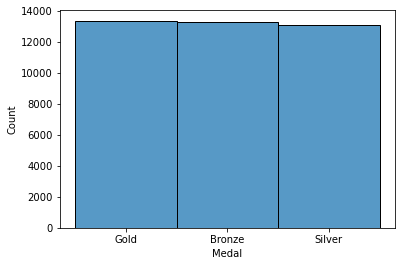

In [14]:
sns.histplot(dfOlympics, x = "Medal")

<AxesSubplot:xlabel='Sex', ylabel='Count'>

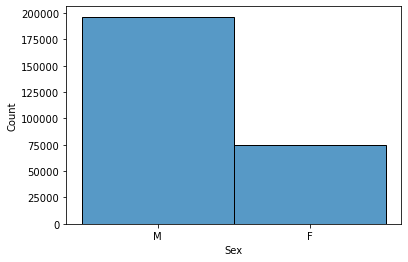

In [35]:
sns.histplot(data=dfOlympics, x = "Sex")

<AxesSubplot:xlabel='Sex', ylabel='Age'>

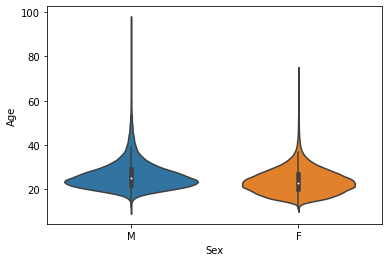

In [38]:
sns.violinplot(data= dfOlympics, x = "Sex", y = "Age")

<AxesSubplot:xlabel='Sex', ylabel='Height'>

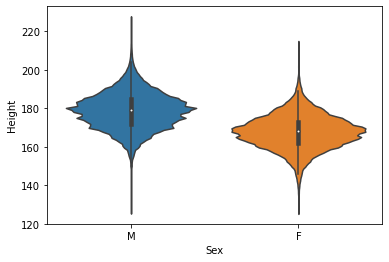

In [39]:
sns.violinplot(data= dfOlympics, x = "Sex", y = "Height")

<AxesSubplot:xlabel='Sex', ylabel='Weight'>

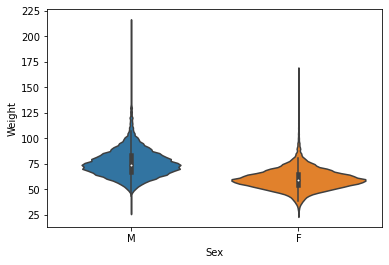

In [40]:
sns.violinplot(data= dfOlympics, x = "Sex", y = "Weight")

<H1> 3. Export the processed files

In [97]:
dfOlympics.to_csv("/Users/marlonbraun/Desktop/CBS Copenhagen/1. Semester/Visual Analytics/Final Project/Project/Data/ProcessedFiles/dfOlympics.csv", index= False)